# Project: Identifying characteristics of appointment 'No Show' patients.

## Introduction:
In this analysis we are using the 'No-Show Appointments' data to identify a pattern among the patients that do not show up for an appointment. To achieve this, we are analysing the no show patients across multiple variables like age groups, gender, scholarship, SMS received and others. This analysis is still work in progress and not the final output. 

So let's get started!

In [66]:
#Loading data and creating data fromes

import pandas as pd, matplotlib.pyplot as plt, numpy as np, datetime, seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

df=pd.read_csv(r'C:\Vinit\Udacity\Project 2\noshowappointments.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


# Initial Data checks

In [67]:
#Checking for any null values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


##### There are no null/missing values in any column

In [68]:
#Checking for any duplicates in the data
sum(df.duplicated())

0

##### There are no duplicate rows in the data set.

##### Observation: Overall the data looks clean

# Data Wrangling

#### Converting the column names to lower case and renaming no-show to no_show

In [69]:
#Looping over column names to convert them into lower case
for c in df.columns:
    df.rename(columns={c:c.lower()},inplace=True)
    
#Renaming no_show column for convenience    
df.rename(columns={'no-show':'no_show'},inplace=True)

#### Data Cleaning and new column creation

In [70]:
#There is -1 in age column so setting that value to 0
df.loc[df[df['age']<0].index,'age']=0

#Calculating number of age group bins
bins=[i for i in range(0,130,10)]

# Creating age group labels for bins
labels=[str(i-9)+'-'+str(i) for i in bins[1:]]


#Creating age group bins column
df['age_grp']=pd.cut(x=df['age'],bins=bins,labels=labels,include_lowest=True)


#Creating a weekday name column of appointment day
df['app_weekday']=df['appointmentday'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%dT%H:%M:%SZ').strftime('%a'))

##### Observation: Since the data set does not have many issues, very few data wrangling steps are required.

# Exploratory Data Analysis And Visualization

### Creating a data set for non show patients

In [71]:
# Creating a data set of No show patients that will be used for most of the furthur analysis
ns_df=df[df['no_show']=='Yes']
ns_df.head(2)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_grp,app_weekday
6,733688164476661,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes,21-30,Fri
7,3449833394123,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes,31-40,Fri


## Gender Analysis

## Q: Does a particular gender and age group is asociated with high no show rates?

### No Show rate by gender

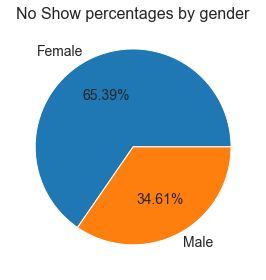

In [72]:
# Calculating Total rows in non show data set
ns_tot=ns_df['appointmentid'].count()


#Plotting No Show percentages by gender
(ns_df.groupby('gender').count()['age']*100/ns_df['gender'].count()).plot(kind='pie',labels=['Female','Male'],fontsize=14,
autopct='%1.2f%%')
plt.ylabel(None)
plt.title('No Show percentages by gender',fontsize=16)
plt.tight_layout()

#### How is the No Show trend for both the genders by age?

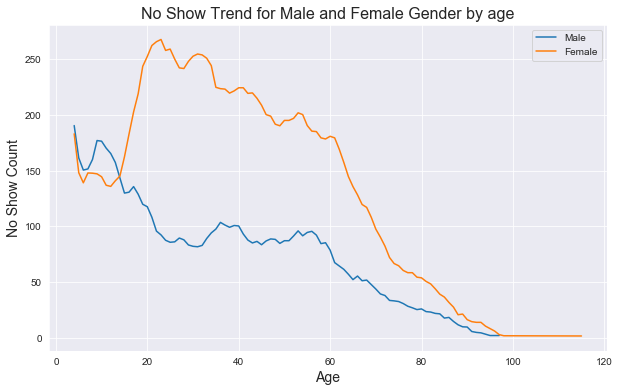

In [73]:
fig,axes=plt.subplots(figsize=(10,6))
# Plotting the Male Trend
axes.plot(ns_df[ns_df['gender']=="M"][['age','appointmentid']].groupby('age',as_index=False).count()['age'],
ns_df[ns_df['gender']=="M"][['age','appointmentid']].groupby('age',as_index=False).count()['appointmentid'].rolling(5).mean(),
label="Male");
# Plotting the Female Trend
axes.plot(ns_df[ns_df['gender']=="F"][['age','appointmentid']].groupby('age',as_index=False).count()['age'],
ns_df[ns_df['gender']=="F"][['age','appointmentid']].groupby('age',as_index=False).count()['appointmentid'].rolling(5).mean(),
label="Female");

axes.set_title('No Show Trend for Male and Female Gender by age',fontsize=16)
axes.set_xlabel('Age',fontsize=14)
axes.set_ylabel('No Show Count',fontsize=14)
axes.set_ylabel('No Show Count',fontsize=14)
#axes.xti
plt.legend();

##### Observations: As the data set contains more females as compared to men, the no show count for the females is high. But, here the trend also shows that the No show count for females is high but gradually decreasing between ages 20 to 60 years.

##### While, for male patients, the no show rate is gradually decreasing from early ages.

##### To understand this trend better, we'll create age groups (code present above in data wrangling section).

#### No Show rate by age Groups

In [74]:
ns_df[['age_grp','appointmentid']].groupby('age_grp').count().apply(lambda x:x*100/ns_df['appointmentid'].count())

,appointmentid
age_grp,
1-10,16.972087
11-20,14.821453
21-30,15.206774
31-40,14.480936
41-50,12.858999
51-60,12.191406
61-70,7.383843
71-80,3.983153
81-90,1.823558


##### Observation: The No show rate for both the gender is high for age groups below 40.

### Analysis by age group and gender on No Show Percentages

appointmentid
age_grp gender               
1-10    F            7.979748
        M            8.992338
11-20   F            9.279090
        M            5.542363
21-30   F           11.443165
        M            3.763609
31-40   F           10.045253
        M            4.435683
41-50   F            9.032663
        M            3.826336
51-60   F            8.306824
        M            3.884583
61-70   F            5.224248
        M            2.159595
71-80   F            2.661410
        M            1.321744
81-90   F            1.196290
        M            0.627268
91-100  F            0.206102
        M            0.058246
101-110 F                 NaN
        M                 NaN
111-120 F            0.013441
        M                 NaN

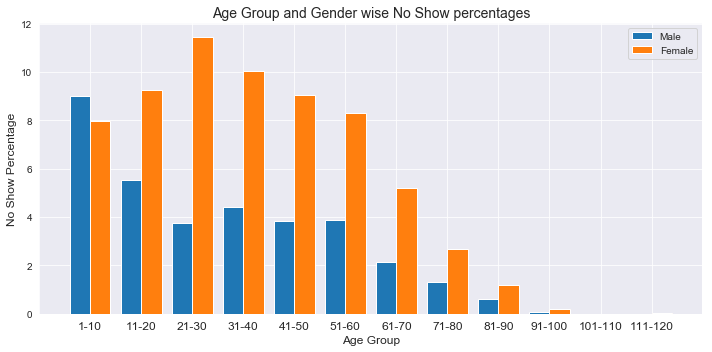

In [75]:
#Plotting the distribution of No show percentages by age groups and gender.

age_labels=df[['age_grp','appointmentid']].groupby('age_grp',as_index=False).count()['age_grp']

m_ns_pct=[]
f_ns_pct=[]

for age in age_labels:
    m=(ns_df[(ns_df['gender']=="M") & (ns_df['age_grp']==age)]['appointmentid'].count()/ns_tot)*100
    f=(ns_df[(ns_df['gender']=="F") & (ns_df['age_grp']==age)]['appointmentid'].count()/ns_tot)*100
    m_ns_pct.append(m)
    f_ns_pct.append(f)
    
indx=np.arange(len(age_labels))
wdth=0.4
plt.figure(figsize=(10,5))
loc=indx+wdth/2

plt.bar(indx,m_ns_pct,width=0.4,label='Male');
plt.bar(indx+wdth,f_ns_pct,width=0.4,label='Female');
plt.xticks(loc,age_labels,fontsize=12);
plt.title('Age Group and Gender wise No Show percentages',fontsize=14);
plt.tick_params(axis='x',rotation=0)
plt.xlabel('Age Group',fontsize=12)
plt.ylabel('No Show Percentage',fontsize=12);
plt.legend()
plt.tight_layout()

ns_df[['age_grp','gender','appointmentid']].groupby(['age_grp','gender']).count().apply(lambda x:x*100/ns_df['appointmentid'].count())

##### Observations: 
1) Overall, the No show rate for age group 1-10 is highest at 17%.

2) When compared at gender level, it shows that the No Show rate for female patients is higher as compared to male patients for most of the age groups, the higest being 11.44% for age group 21-30 and 10% for age group 31-40.

## Scholarship Analysis

## Q: Does the absence of scholarship affect the No show rate?

### No Show rate by Scholarship status and gender

In [76]:
# Checking the percentage of appointment No Show for patients with scholarships
df[df['scholarship']==1][['no_show','appointmentid','gender']].groupby(['gender','no_show']).count()*100/df[df['scholarship']==1]['appointmentid'].count()

appointmentid
gender no_show               
F      No           62.121352
       Yes          19.390480
M      No           14.142344
       Yes           4.345825

##### Observation: By looking at the data above, we can say that scholarship owners are less like to miss an appointment. And more than 80% of the scholarship owners are women.

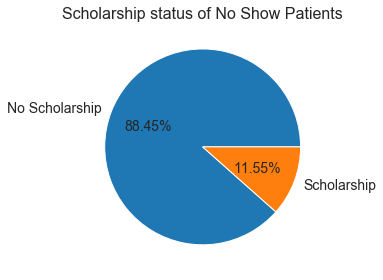

In [77]:
#Plotting Scholarship status of No show patients

(ns_df.groupby('scholarship').count()['appointmentid']*100/ns_df['appointmentid'].count()).plot(kind='pie',
labels=['No Scholarship','Scholarship'],fontsize=14,autopct='%1.2f%%')
plt.title("Scholarship status of No Show Patients",fontsize=16);
plt.ylabel(None)
plt.tight_layout()

### Age Groups and Gender wise distribution on Non Scholarship patients

appointmentid
age_grp gender               
1-10    F            7.159819
        M            7.970787
11-20   F            7.737802
        M            4.986783
21-30   F            9.485192
        M            3.629195
31-40   F            7.589946
        M            4.319190
41-50   F            7.482414
        M            3.741207
51-60   F            7.504817
        M            3.750168
61-70   F            4.933017
        M            2.110310
71-80   F            2.643488
        M            1.303822
81-90   F            1.196290
        M            0.627268
91-100  F            0.206102
        M            0.058246
101-110 F                 NaN
        M                 NaN
111-120 F            0.013441
        M                 NaN

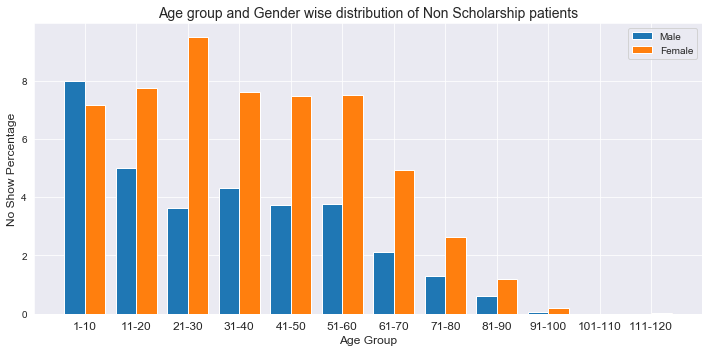

In [78]:
# Plotting the age group and gender wise distribution of Non Scholarship patients.
age_labels=df[['age_grp','appointmentid']].groupby('age_grp',as_index=False).count()['age_grp']

m_ns_nsch_pct=[]
f_ns_nsch_pct=[]

for age in age_labels:
    m=(ns_df[(ns_df['gender']=="M") & (ns_df['age_grp']==age) & (ns_df['scholarship']==0)]['appointmentid'].count()/ns_tot)*100
    f=(ns_df[(ns_df['gender']=="F") & (ns_df['age_grp']==age) & (ns_df['scholarship']==0)]['appointmentid'].count()/ns_tot)*100
    m_ns_nsch_pct.append(m)
    f_ns_nsch_pct.append(f)
    
indx=np.arange(len(age_labels))
wdth=0.4
plt.figure(figsize=(10,5))
loc=indx+wdth/2

plt.bar(indx,m_ns_nsch_pct,width=0.4,label='Male');
plt.bar(indx+wdth,f_ns_nsch_pct,width=0.4,label='Female');
plt.xticks(loc,age_labels,fontsize=12);
plt.title('Age group and Gender wise distribution of Non Scholarship patients',fontsize=14);
plt.tick_params(axis='x',rotation=0)
plt.xlabel('Age Group',fontsize=12)
plt.ylabel('No Show Percentage',fontsize=12);
plt.legend()
plt.tight_layout()

(ns_df[ns_df['scholarship']==0][['gender','age_grp','appointmentid']].groupby(['age_grp','gender']).count()).apply(lambda x:x*100/ns_df['appointmentid'].count())

##### Observations: 
##### 1) Almost 89% of the No show patients do not have a scholarship, which may suggest a relation between scholarship and appointment no show.

##### 2) Among the non scholarship patients, No Show rate of female patients is high, specially within the females of age group between 21 to 30.

## SMS Received Analysis
## Q: Does receiving an SMS lowers no show rate?

### SMS Received percentage Analysis

In [79]:
#Percentage of No show patients that reeived SMS
ns_df[['sms_received','appointmentid']].groupby('sms_received').count().apply(lambda x:x*100/ns_df['appointmentid'].count())

,appointmentid
sms_received,
0,56.162911
1,43.837089


### How the no show patients are distributed in terms of age groups and gender

appointmentid
age_grp gender               
1-10    F            3.476858
        M            3.561988
11-20   F            4.363995
        M            1.868363
21-30   F            5.891841
        M            1.635378
31-40   F            4.847887
        M            1.971414
41-50   F            4.144451
        M            1.559210
51-60   F            3.678480
        M            1.554729
61-70   F            2.146154
        M            0.914019
71-80   F            1.070837
        M            0.479412
81-90   F            0.439088
        M            0.165778
91-100  F            0.049285
        M            0.017922
101-110 F                 NaN
        M                 NaN
111-120 F                 NaN
        M                 NaN

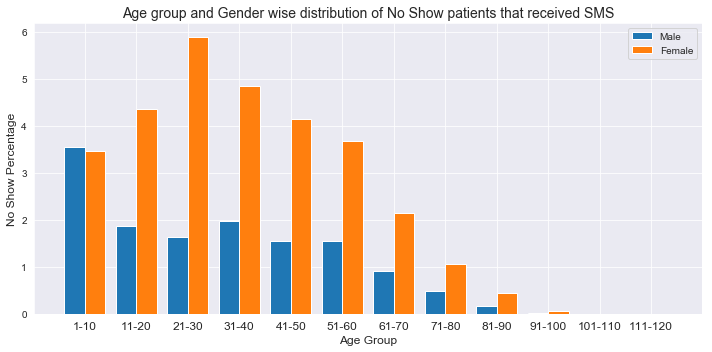

In [80]:
#Plotting the distribution of SMS received by age groups and gender.
age_labels=df[['age_grp','appointmentid']].groupby('age_grp',as_index=False).count()['age_grp']

m_ns_sms_pct=[]
f_ns_sms_pct=[]

for age in age_labels:
    m=(ns_df[(ns_df['gender']=="M") & (ns_df['age_grp']==age) & (ns_df['sms_received']==1)]['appointmentid'].count()/ns_tot)*100
    f=(ns_df[(ns_df['gender']=="F") & (ns_df['age_grp']==age) & (ns_df['sms_received']==1)]['appointmentid'].count()/ns_tot)*100
    m_ns_sms_pct.append(m)
    f_ns_sms_pct.append(f)
    
indx=np.arange(len(age_labels))
wdth=0.4
plt.figure(figsize=(10,5))
loc=indx+wdth/2

plt.bar(indx,m_ns_sms_pct,width=0.4,label='Male');
plt.bar(indx+wdth,f_ns_sms_pct,width=0.4,label='Female');
plt.xticks(loc,age_labels,fontsize=12);
plt.title('Age group and Gender wise distribution of No Show patients that received SMS',fontsize=14);
#plt.tick_params(axis='x',rotation=90)
plt.xlabel('Age Group',fontsize=12)
plt.ylabel('No Show Percentage',fontsize=12);
plt.legend()
plt.tight_layout()

ns_df[ns_df['sms_received']==1][['age_grp','gender','appointmentid']].groupby(['age_grp','gender']).count().apply(lambda x:x*100/ns_df['appointmentid'].count())

##### Observations: 
##### 1) Out of all the No show patients, 44% patients did receive an SMS, which suggest that receiving an SMS does not necessarily result into low No Show rates, atleat in this particular case.
##### 2)The No show rate for female patients in age group 21-30 is highest among the no show patients that received a SMS

## Appointmentday Analysis

## Q: Are any appointment days associated with high no show rates?

,appointmentid
app_weekday,
Fri,18.087728
Mon,21.013486
Sat,0.040324
Thu,14.955867
Tue,23.083471
Wed,22.819123


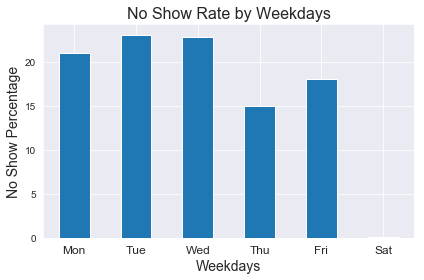

In [81]:
weekday=['Mon','Tue','Wed','Thu','Fri','Sat'] #weekday labels
#ns_df[['app_weekday','appointmentid']].groupby('app_weekday').count().apply(lambda x:x*100/ns_df['appointmentid'].count())

ns_df['app_weekday'].value_counts().apply(lambda x:x*100/ns_df['appointmentid'].count())[weekday].plot(kind='bar');
plt.title('No Show Rate by Weekdays',fontsize=16)
plt.xlabel('Weekdays',fontsize=14)
plt.ylabel('No Show Percentage',fontsize=14)
plt.tick_params(rotation=0)
plt.xticks(fontsize=12)
plt.tight_layout()

ns_df[['app_weekday','appointmentid']].groupby('app_weekday').count()*100/ns_df['age'].count()

##### Observations: The No Show rate is high on Tuesdays and Wednesdays. Since we do not have the time information for the appointment dates, we cannot identify at what times of the day the no show rate is high

## Alcoholism

### Q: How alcoholism affects the no show rates of the two gender?

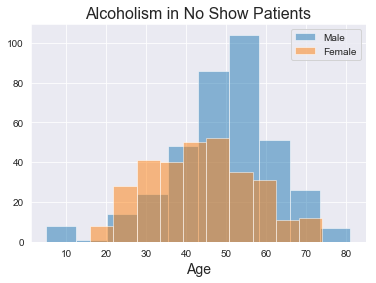

In [82]:
#Checking the no show count of alcoholic patients of both genders
ns_df[(ns_df['alcoholism']==1) & (ns_df['gender']=="M")]['age'].hist(label='Male',alpha=0.5,bins=10);
ns_df[(ns_df['alcoholism']==1) & (ns_df['gender']=="F")]['age'].hist(label='Female',alpha=0.5,bins=10);
plt.title("Alcoholism in No Show Patients",fontsize=16)
plt.xlabel("Age",fontsize=14)
plt.legend();

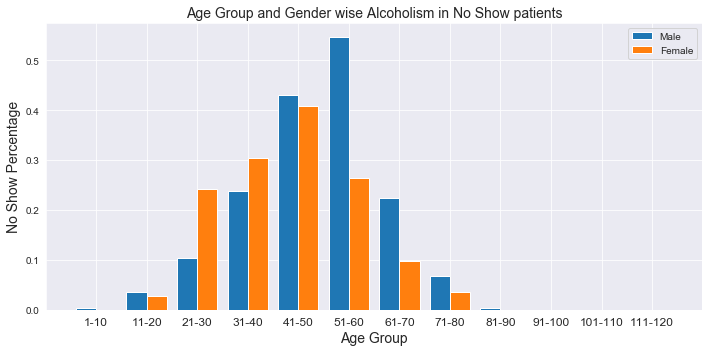

In [83]:
age_labels=df[['age_grp','appointmentid']].groupby('age_grp',as_index=False).count()['age_grp']

m_alch_ns_pct=[]
f_alch_ns_pct=[]

for age in age_labels:
    m=(ns_df[(ns_df['gender']=="M") & (ns_df['age_grp']==age) & (ns_df['alcoholism']==1)]['appointmentid'].count()*100)/ns_df['appointmentid'].count()
    f=(ns_df[(ns_df['gender']=="F") & (ns_df['age_grp']==age) & (ns_df['alcoholism']==1)]['appointmentid'].count()*100)/ns_df['appointmentid'].count()
    m_alch_ns_pct.append(m)
    f_alch_ns_pct.append(f)
    
indx=np.arange(len(age_labels))
wdth=0.4
plt.figure(figsize=(10,5))
loc=indx+wdth/2

plt.bar(indx,m_alch_ns_pct,width=0.4,label='Male');
plt.bar(indx+wdth,f_alch_ns_pct,width=0.4,label='Female');
plt.xticks(loc,age_labels,fontsize=12);
plt.title('Age Group and Gender wise Alcoholism in No Show patients',fontsize=14);
plt.tick_params(axis='x',rotation=0)
plt.xlabel('Age Group',fontsize=14)
plt.ylabel('No Show Percentage',fontsize=14);
plt.legend()
plt.tight_layout()

##### Observations: Even with less number of males as compared to female patients, we can see that the alcoholism issue is more common among male patients, specially among the patients of age group 51-60 years.

## Scheduled Day Analysis

## Q: Does appointments scheduled at a particular time of the day affect the no show rate?

### Scheduled time of the day analysis

In [84]:
sch_date=ns_df['scheduledday'].apply(lambda x:datetime.datetime.strptime(x,'%Y-%m-%dT%H:%M:%SZ'))
rng=np.arange(1,25)
sch_date.apply(lambda x:x.hour).value_counts()

7     2911
8     2804
9     2526
10    2440
14    2070
11    1928
13    1891
15    1873
16    1317
12    1104
17     722
6      303
18     285
19     114
20      30
21       1
Name: scheduledday, dtype: int64

### No Show rates for appointments scheduled at different times of the day

Morning    57.852054
Noon       31.085622
Evening    10.923428
Night       0.138895
Name: scheduledday, dtype: float64

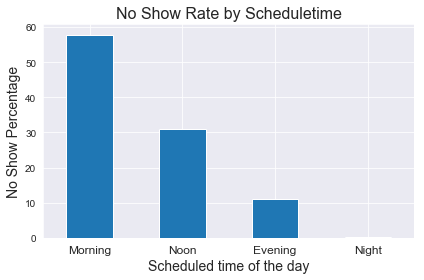

In [85]:
bins=[0,11,15,19,23]
labels=['Morning','Noon','Evening','Night']
time_grp=pd.cut(sch_date.apply(lambda x:x.hour),bins=bins,labels=labels,include_lowest=True)

(time_grp.value_counts()*100/ns_df['appointmentid'].count()).plot(kind='bar');
plt.title('No Show Rate by Scheduletime',fontsize=16)
plt.xlabel('Scheduled time of the day',fontsize=14)
plt.ylabel('No Show Percentage',fontsize=14)
plt.tick_params(rotation=0)
plt.xticks(fontsize=12)
plt.tight_layout()

time_grp.value_counts()*100/ns_df['appointmentid'].count()

##### Observations: Almost 60% of the no show appointments were scheduled in the morning time. 

## Region Analysis

## Q: Does certain neighbourhoods are associated with high no show rates?

### Checking the top 5 neighborhood where the No Show ratio is higer as compare to other neighborhoods

In [86]:
top_5_reg=ns_df[['neighbourhood','appointmentid']].groupby('neighbourhood').count().apply(lambda x:x*100/ns_df['appointmentid'].count()).sort_values('appointmentid',ascending=False).head()

In [87]:
top_5_reg

,appointmentid
neighbourhood,
JARDIM CAMBURI,6.563914
MARIA ORTIZ,5.461714
ITARARÉ,4.135490
RESISTÊNCIA,4.059322
CENTRO,3.149783


### Checking the gender wise distrubtion of top 5 regions with high No Show ratios.

In [88]:
ns_df[ns_df['neighbourhood'].isin(top_5_reg.index)][['neighbourhood','gender','appointmentid']].groupby(['neighbourhood','gender']).count().apply(lambda x:x*100/ns_df['appointmentid'].count())

appointmentid
neighbourhood  gender               
CENTRO         F            1.783234
               M            1.366549
ITARARÉ        F            2.706214
               M            1.429276
JARDIM CAMBURI F            4.467046
               M            2.096868
MARIA ORTIZ    F            3.557507
               M            1.904207
RESISTÊNCIA    F            2.553878
               M            1.505444

##### Observations: The highest No show rate at 6.6% is from JARDIM CAMBURI neighbourhood, where female no show rate is 4.5% and for males it is 2.1%

### Considerations:
### Also, I've noticed that for some patient ids there are multiple entries for same appointment day and scheduleday but have a very short time difference, I'm considering these appointments as seperate appointments as they have different appointment ids.

### Limitations:
### 1) The data set contains appointment days data for just over a month (2016-04-29 to 2016-06-08), so the findings from above analysis may be seasonal and may differ from the overall trend of long term.
### 2) The data set does not have the appointment time information, which may have helped to provide better insights into this analysis.

## Conclusion:
### Based on the analysis, the chances of No show appointments are high for female patients from age group   21-30 and above with no scholarship and lives in the neighbourhoods like Jardim Camburi, Maria Ortiz, Itarare. Appointment days like Tuesdays and Wednesdays have seen high no show rates whereas, the appointment scheduled during the morning time are also likely to be no show appointments.

### As mentioned earlier, please note that this analysis is still 'work in progress'. 